In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
!ls "/content/drive/My Drive/GL-AIML/assignment"
import os
os.chdir("/content/drive/My Drive/GL-AIML/assignment")

SVHN-Digit-Classification-Project-8.ipynb  SVHN_single_grey1.h5


In [0]:
import h5py
import numpy as np

In [0]:
# Load data i.e. the hierrachical data format file (h5 file)
h5f = h5py.File('SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()


In [11]:
print('Training set = ', X_train.shape, y_train.shape)
print('Validation set = ', X_val.shape, y_val.shape)
print('Test set = ', X_test.shape, y_test.shape)

Training set =  (42000, 32, 32) (42000,)
Validation set =  (60000, 32, 32) (60000,)
Test set =  (18000, 32, 32) (18000,)


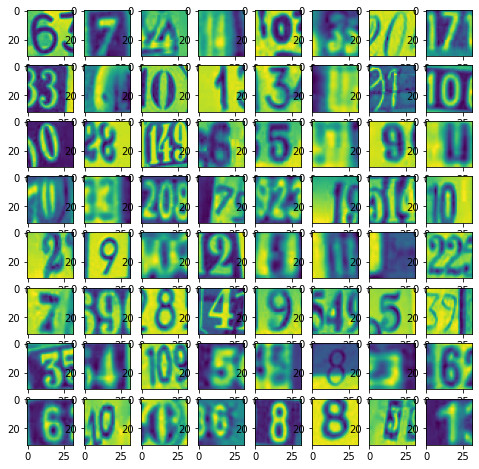

In [12]:
 #visualize the dataset
%matplotlib inline
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 8
rows = 8
for i in range(1, columns*rows +1):
    img = X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [13]:
# add the channel dimension in the data sets for keras
rows , cols, channel = 32, 32, 1
input_shape = (rows, cols, 1)

X_train = X_train.reshape(X_train.shape[0], rows, cols, channel)
X_test = X_test.reshape(X_test.shape[0], rows, cols, channel)
X_val = X_val.reshape(X_val.shape[0], rows, cols, channel)
input_shape = (rows, cols, channel)

print('Training set = ', X_train.shape, y_train.shape)
print('Validation set = ', X_val.shape, y_val.shape)
print('Test set = ', X_test.shape, y_test.shape)

Training set =  (42000, 32, 32, 1) (42000,)
Validation set =  (60000, 32, 32, 1) (60000,)
Test set =  (18000, 32, 32, 1) (18000,)


In [0]:
# number of target class is 10 - as the unique digits in universe 
num_class = 10 

In [15]:
import keras
# convert class to binary matrices
y_train = keras.utils.to_categorical(y_train, num_class)
y_val = keras.utils.to_categorical(y_val, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)

# normalization of data 
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_val /= 255
X_test /= 255

print('Training set = ', X_train.shape, y_train.shape)
print('Validation set = ', X_val.shape, y_val.shape)
print('Test set = ', X_test.shape, y_test.shape)

Using TensorFlow backend.


Training set =  (42000, 32, 32, 1) (42000, 10)
Validation set =  (60000, 32, 32, 1) (60000, 10)
Test set =  (18000, 32, 32, 1) (18000, 10)


In [22]:
# The model for classification
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,Activation,MaxPooling2D,Dropout,Flatten  
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

model = Sequential()
#input shape = 32,32,1
# 1st Conv Layer
model.add(Convolution2D(32, kernel_size= (3, 3), input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(64, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))
model.add(Dropout(0.5,name='drop_1'))
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu',name='dense_1'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5,name='drop_2'))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_class, activation='softmax',name='dense_2'))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  del sys.path[0]


In [23]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_6 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 14, 14, 64)       

In [24]:
# Configuring the optimizers
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.002)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [30]:
# Train the model
#Training on the dataset
model.fit(X_train, y_train,
          batch_size=512,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 219s 5ms/step - loss: 2.3027 - acc: 0.0966 - val_loss: 2.3027 - val_acc: 0.0955
Epoch 2/10
42000/42000 [==============================] - 219s 5ms/step - loss: 2.3026 - acc: 0.0989 - val_loss: 2.3027 - val_acc: 0.0955
Epoch 3/10
42000/42000 [==============================] - 220s 5ms/step - loss: 2.3026 - acc: 0.1019 - val_loss: 2.3027 - val_acc: 0.0955
Epoch 4/10
42000/42000 [==============================] - 219s 5ms/step - loss: 2.3026 - acc: 0.0990 - val_loss: 2.3027 - val_acc: 0.0955
Epoch 5/10
42000/42000 [==============================] - 219s 5ms/step - loss: 2.3026 - acc: 0.1014 - val_loss: 2.3028 - val_acc: 0.0955
Epoch 6/10
42000/42000 [==============================] - 219s 5ms/step - loss: 2.3027 - acc: 0.1006 - val_loss: 2.3028 - val_acc: 0.0955
Epoch 7/10
42000/42000 [==============================] - 219s 5ms/step - loss: 2.3027 - acc: 0.1000 - val_loss: 2.3027 - 

In [31]:
# evaluate accuracy on test
score = model.evaluate(X_test, y_test)
print('loss:', score[0])
print('accuracy:', score[1])

18000/18000 [==============================] - 31s 2ms/step
Test loss: 2.302694819556342
Test accuracy: 0.0955


In [32]:
# evaluate accuracy on validation set
score = model.evaluate(X_val, y_val)
print('loss:', score[0])
print('accuracy:', score[1])

60000/60000 [==============================] - 104s 2ms/step
loss: 2.3026011942545574
accuracy: 0.1


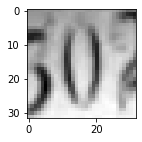

3


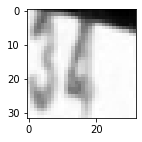

3


In [39]:
plt.figure(figsize=(2,2))
plt.imshow(X_val[44].reshape(32,32),cmap="gray")
plt.show()
print(np.argmax(model.predict(X_val[44].reshape(1,32,32,1))))


plt.figure(figsize=(2,2))
plt.imshow(X_val[17000].reshape(32,32),cmap="gray")
plt.show()
print(np.argmax(model.predict(X_val[17000].reshape(1,32,32,1))))